In [1]:
import numpy
import pandas as pd
import nltk
import seaborn
import stylecloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler


In [2]:
df = pd.read_csv(r'C:/Users/anany/Documents/GitHub/Amazon-Customer-Sentiment/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.drop('Time', axis=1, inplace = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Upvote%'] = numpy.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [5]:
df.drop(['HelpfulnessNumerator','HelpfulnessDenominator'], axis=1, inplace = True)
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
df['Upvote Range'] = pd.cut(df['Upvote%'], bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Empty', '0-20%','20-40%','40-60%','60-80%','80-100%'])
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Upvote%,Upvote Range
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [7]:
df_pivot_table = df.groupby(['Score', 'Upvote Range']).agg({'Id':'count'}).reset_index()
df_pivot_table

,Score,Upvote Range,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [8]:
df_heatmap = df_pivot_table.pivot(index = 'Upvote Range',columns='Score')
df_heatmap

Id                            
Score             1     2      3      4       5
Upvote Range                                   
Empty          8060  4234   5062   4780   11638
0-20%          2338   762    474    116     432
20-40%         4649  1618   1506    909    2275
40-60%         6586  3051   3384   3185   10312
60-80%         5838  2486   2754   2941   11060
80-100%       12531  7014  11037  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='Upvote Range'>

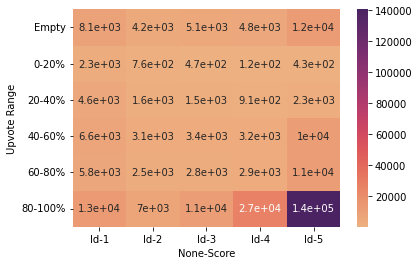

In [9]:
seaborn.heatmap(df_heatmap,annot=True, cmap='flare')

In [10]:
# Removing the rating inputs of 3-star as they are neither positive nor negative reviews
df = df[df['Score']!=3]
df['Score'].unique()

# Taking df['Text'] to be the data to work on 
X = df['Text']

In [11]:
# Mapping Score = 4,5 as positive (y=1) and Score = 1,2 as negative (y=0)
mapping_guide = {1:0,2:0,4:1,5:1}
y = df['Score'].map(mapping_guide)

In [12]:
CountVectorizer_var = CountVectorizer(stop_words='english')
X_count = CountVectorizer_var.fit_transform(X)
X_count.shape

(525814, 114969)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_count,y)
X_test.shape

# Fit the train data into Logistic Regression model
logistic_var = LogisticRegression()
log_model = logistic_var.fit(X_train, y_train)

print('Accuracy(Logistic Regression with CountVectorizer): {:.2f}%'.format(log_model.score(X_test, y_test)*100))

C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy(Logistic Regression with CountVectorizer): 93.63%


In [14]:
df_word_coef = pd.DataFrame({'Word':CountVectorizer_var.get_feature_names_out(), 'Coefficient':log_model.coef_.tolist()[0]})
df_word_coef.sort_values(['Coefficient', 'Word'],ascending = False, inplace = True)

In [15]:
df_word_coef.head(20)

,Word,Coefficient
80600,pleasantly,3.667333
94667,skeptical,3.069300
39072,downside,2.970692
5865,addicting,2.662394
39214,drawback,2.622655
55029,hooked,2.335855
87967,resist,2.320748
111520,welcome,2.147840
111911,whim,2.088327
35726,delish,2.076767


In [16]:
df_word_coef.sort_values(['Coefficient', 'Word'], inplace = True)
df_word_coef.head(20)

,Word,Coefficient
34989,deceptive,-3.714249
107383,undrinkable,-3.350738
37560,disappointing,-3.328444
113164,worst,-3.225162
106852,unacceptable,-3.027244
88945,ripoff,-2.971086
88351,returnable,-2.943615
24949,cancelled,-2.882392
62401,lacked,-2.621076
67898,mediocre,-2.565014


In [17]:
# Combining the data modelling computations in a function

def fun_modelling(X, y, nlp_model, ml_model, show_topwords = 1):

    print('Vectorizing data...')
    X_vector = nlp_model.fit_transform(X)
    print('Vectorization complete!!!')
    print('Features: {}'.format(X_vector.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X_vector,y) 
    print('Training model...')
    fit_model = ml_model.fit(X_train, y_train)
    print('Model Trained!!!')

    print('Calculating accuracy...')
    accuracy = fit_model.score(X_test, y_test) 
    print('Accuracy: {:.2f}'.format(accuracy*100))  

    if show_topwords == 1:
        df_word_coef = pd.DataFrame({'Word':CountVectorizer_var.get_feature_names_out(), 'Coefficient':log_model.coef_.tolist()[0]})
        # Displaying top positive words
        df_word_coef.sort_values(['Coefficient', 'Word'],ascending = False, inplace = True)
        print('Displaying top words from positive reviews:')
        print(df_word_coef.head(10))
        print()

        # Displaying top negative words
        df_word_coef.sort_values(['Coefficient', 'Word'], inplace = True)
        print('Displaying top words from negative reviews:')
        print(df_word_coef.head(10))

In [18]:
fun_modelling(X, y, CountVectorizer(stop_words='english'), LogisticRegression())

Vectorizing data...
Vectorization complete!!!
Features: 114969
Training model...


C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Trained!!!
Calculating accuracy...
Accuracy: 93.58
Displaying top words from positive reviews:
              Word  Coefficient
80600   pleasantly     3.667333
94667    skeptical     3.069300
39072     downside     2.970692
5865     addicting     2.662394
39214     drawback     2.622655
55029       hooked     2.335855
87967       resist     2.320748
111520     welcome     2.147840
111911        whim     2.088327
35726       delish     2.076767

Displaying top words from negative reviews:
                 Word  Coefficient
34989       deceptive    -3.714249
107383    undrinkable    -3.350738
37560   disappointing    -3.328444
113164          worst    -3.225162
106852   unacceptable    -3.027244
88945          ripoff    -2.971086
88351      returnable    -2.943615
24949       cancelled    -2.882392
62401          lacked    -2.621076
67898        mediocre    -2.565014


In [19]:
def predict_values(X, y, nlp_model, ml_model):
    print('Vectorizing data...')
    X_vector = nlp_model.fit_transform(X)
    print('Vectorization complete!!!')
    print('Features: {}'.format(X_vector.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X_vector,y) 
    print('Training model...')
    fit_model = ml_model.fit(X_train, y_train)
    print('Model Trained!!!')

    model_predictions = fit_model.predict(X_test)

    print('Calculating Confusion Matrix...')
    c_matrix = ConfusionMatrixDisplay.from_predictions(y_test, model_predictions, normalize='true')
    print(c_matrix)

    print('Calculating accuracy...')
    accuracy = accuracy_score(model_predictions, y_test) 
    print('Accuracy: {:.2f}'.format(accuracy*100))

Vectorizing data...
Vectorization complete!!!
Features: 114969
Training model...


C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Trained!!!
Calculating Confusion Matrix...
Calculating accuracy...
Accuracy: 93.64


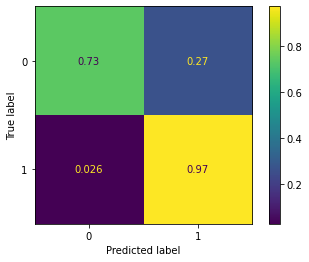

In [20]:
count = CountVectorizer(stop_words='english')
Log_reg = LogisticRegression()
predict_values(X,y,count, Log_reg)

In [21]:
df_Tfidf = df[df['Score']!=3]

df_Tfidf = df[df['Upvote Range'].isin(['0-20%','20-40%','60-80%','80-100%'])]

Range_map = {'0-20%':0,'20-40%':0,'60-80%':1,'80-100%':1}

X_Tfidf = df_Tfidf['Text']
y_Tfidf = df_Tfidf['Upvote Range'].map(Range_map)
y_Tfidf.value_counts()

1.0    209238
0.0     13099
Name: Upvote Range, dtype: int64

Vectorizing data...
Vectorization complete!!!
Features: 114969
Training model...
Model Trained!!!
Calculating Confusion Matrix...
Calculating accuracy...
Accuracy: 84.40


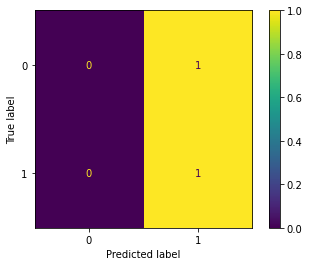

In [22]:
# Confirming imbalanced data using Dummy Classifier
predict_values(X,y,count, DummyClassifier())

In [26]:
# Fixing the imbalanced data
ob_oversampler = RandomOverSampler()
X_train_new, y_train_new = ob_oversampler.fit_resample(X_count, y)

print('Old y values: {}'.format(y.value_counts()))
print('New y values: {}'.format(y_train_new.value_counts()))

Old y values: 1    443777
0     82037
Name: Score, dtype: int64
New y values: 1    443777
0    443777
Name: Score, dtype: int64


In [54]:
Tfidf_var = TfidfVectorizer(stop_words='english')
Tfidf_model = Tfidf_var.fit_transform(X_Tfidf)

Tfidf_model.shape


(222337, 82050)

In [59]:
ob_oversampler = RandomOverSampler()
X_train_new, y_train_new = ob_oversampler.fit_resample(Tfidf_model, y_Tfidf)
print('Old y values: {}'.format(y_Tfidf.value_counts()))
print('New y values: {}'.format(y_train_new.value_counts()))

X_train, X_test, y_train, y_test = train_test_split(Tfidf_model,y_Tfidf)
X_test.shape

Old y values: 1.0    209238
0.0     13099
Name: Upvote Range, dtype: int64
New y values: 1.0    209238
0.0    209238
Name: Upvote Range, dtype: int64


(55585, 82050)

C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculating Confusion Matrix...
Calculating accuracy...
Accuracy: 87.51


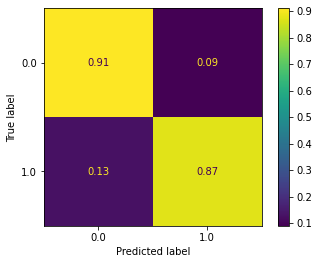

In [60]:
New_log_var = LogisticRegression()
Log_fit_model = New_log_var.fit(X_train_new, y_train_new)
Tfidf_prediction = Log_fit_model.predict(X_test)

print('Calculating Confusion Matrix...')
c_matrix = ConfusionMatrixDisplay.from_predictions(y_test, Tfidf_prediction, normalize='true')
print(c_matrix)

print('Calculating accuracy...')
accuracy = accuracy_score(Tfidf_prediction, y_test) 
print('Accuracy: {:.2f}'.format(accuracy*100))
